# Tutorial - Pysyology 0.0.8
In this tutorial I will show how to analyze ECG, EMG and EDA signal easily with Pysiology.


First, we need to import the library.
If installed correctly, the version should be printed.

In [1]:
import matplotlib.pyplot as plt #used for visualization purposes in this tutorial.

import pysiology
print(pysiology.__version__)

0.0.8


For this tutorial, I will use the sample data contained inside the package.
We can load it through the sampledata method.

Sample data have been recorded using Bitalino Revolution Board at 1000 Hz.

In [2]:
ECG = pysiology.sampledata.loadsampleECG() #load the sample ECG Signal
EMG = pysiology.sampledata.loadsampleEMG() #load the sample EMG Signal
GSR = pysiology.sampledata.loadsampleEDA() #load the sample GSR Signal

sr = 1000 #samplerate in Hz

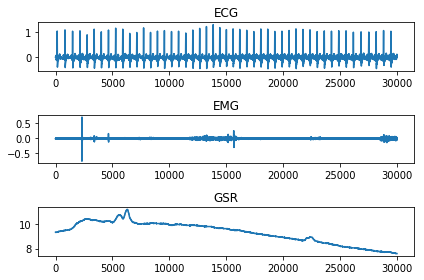

In [3]:
plt.figure("Sample data")
plt.subplot(3,1,1)
plt.plot(ECG[0:30000])
plt.title("ECG")
plt.subplot(3,1,2)
plt.plot(EMG[0:30000])
plt.title("EMG")
plt.subplot(3,1,3)
plt.plot(GSR[0:30000])
plt.title("GSR")
plt.tight_layout()

Let's say that we have two fake events, A and B, at 10 seconds (10'000 in samples) and 20s (20'000 in samples), and we want to compute the features from the onset of the event to 8 seconds later.

In [4]:
#We can define the event in the way we prefer. 
#In this example I will use a 2 x nEvent matrix, containing the name of the event and the onset time.
events = [["A",10],
          ["B",20]]
eventLenght = 8 #lenght in seconds we want to use to compute feature estimation
results = {} #we will store the results in a dict for simplicity.
for event in events:
    startSample = sr * event[1] #samplerate of the signal multiplied by the onset of the event in s
    endSample = startSample + (sr * eventLenght) #Final sample to use for estimation
    results[event[0]] = {} #initialize the results
    results[event[0]]["ECG"] = pysiology.heartrate.analyzeECG(ECG[startSample:endSample],sr) #analyze the ECG signal
    results[event[0]]["EMG"] = pysiology.electromiography.analyzeEMG(EMG[startSample:endSample],sr) #analyze the EMG signal
    results[event[0]]["GSR"] = pysiology.electrodermalactivity.analyzeGSR(GSR[startSample:endSample],sr) #analyze the GSR signal

Results of features extraction are not store inside the results dictionary.

We can try to print some of the results.
For example, the BPM of the two events.

In [5]:
#BPM from the ECG analysis
print("Example of ECG feature:")
print("BPM - A",results["A"]["ECG"]["bpm"])
print("BPM - B",results["B"]["ECG"]["bpm"])

#peak frequency from the EMG analysis
print("Example of EMG feature:")
print("Peak Frequency - A",results["A"]["EMG"]["FrequencyDomain"]["PeakFrequency"])
print("Peak Frequency - B",results["B"]["EMG"]["FrequencyDomain"]["PeakFrequency"])

print("Example of GSR Feature:")
print("Decay Time - A",results["A"]["GSR"][0]["decayTime"]) #here we use 0 beacuse GSR features are computed for each peak.
print("Decay Time - B",results["B"]["GSR"][0]["decayTime"])

Example of ECG feature:
BPM - A 97.5
BPM - B 90.0
Example of EMG feature:
Peak Frequency - A 23.4375
Peak Frequency - B 27.34375
Example of GSR Feature:
Decay Time - A 1.9
Decay Time - B 2.2
